[![logo](https://codeforearth.ecmwf.int/wp-content/uploads/2024/11/ecmwf-logo.svg)](https://codeforearth.ecmwf.int/)

# Geopotential at 500 hPa, temperature at 850 hPa, and 2-metre temperature

**This notebook can be run on free online platforms, such as Colab, or it can be accessed from GitHub. The links to run this notebook in these environments are provided here, but please note they are not supported by ECMWF.**

[![colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/ECMWFCode4Earth/open-data-explorer/blob/main/openDataVisio/examples/Colab/z500-t850-t2m.ipynb)
[![github](https://img.shields.io/badge/Open%20in-GitHub-black?logo=github)](https://github.com/ECMWFCode4Earth/open-data-explorer/blob/main/openDataVisio/examples/Colab/z500-t850-t2m.ipynb)

## Learning objectives 🎯
The notebook will provide you with guidance on how to explore and plot ECMWF open datasets to produce the map using the `earthkit` package. This notebook is based on the [Heat Waves - AIFS](https://ecmwfcode4earth.github.io/open-data-explorer/examples/heat-waves-aifs/) website.

The example shows analysis of the selected parameters:
- [`z`](https://codes.ecmwf.int/grib/param-db/129) geopotential at constant pressure level 500 hPa,
- [`t`](https://codes.ecmwf.int/grib/param-db/130) temperature at 850 hPa, and
- [`2t`](https://codes.ecmwf.int/grib/param-db/167) 2 metre temperature of the **AIFS-Single** datasets on 30 April at 12 UTC in France (48.3° N, 4.1° E).

:::{note}
[Geopotential height](https://codes.ecmwf.int/grib/param-db/156) will be calculated from geopotential, because this parameter is not part of the AIFS products.
:::

## 1. Set Up Your Environment and Find Your Data
Open data will be downloaded from a publicly available [Amazon S3 Bucket](https://aws.amazon.com/marketplace/pp/prodview-ykwikoqdzpamo?sr=0-1&ref_=beagle&applicationId=AWSMPContessa#resources). First, the following Python libraries need to be installed in the current Jupyter kernel:
- [`ecmwf-opendata`](https://github.com/ecmwf/ecmwf-opendata) to download data and
- [`earthkit`](https://earthkit.readthedocs.io/en/latest/) to analyse and plot the data.

:::{seealso}
More detailed information about how to install Python packages is available on the [Retrieve Data](https://ecmwfcode4earth.github.io/open-data-explorer/datadownload/retrieve-data/) website.
:::
If the packages are not installed yet, uncomment the code below and run it.

In [2]:
#!pip3 install earthkit ecmwf-opendata

In [3]:
from ecmwf.opendata import Client
import earthkit.data as ekd
import earthkit.plots as ekp
import earthkit

# os is a module that provides a way to interact with the operating system
import os

### List of parameters to retrieve from open datasets
The selected values below can be modified.
- Parameters available on pressure levels:

In [4]:
PARAM_PL = ["z", "t"]
LEVELS = [500, 850]
LEVELTYPE = "pl"

DATES = [20250429, 20250430, 20250501]
TIME = 0
STEPS = 12
STREAM = "oper"
TYPE = "fc"
MODEL = "aifs-single"

- Parameters available on a single level:

In [14]:
PARAM_SFC = ["2t"]
LEVELTYPE = "sfc"

DATES = [20250429, 20250430, 20250501]
TIME = 0
STEPS = 12
STREAM = "oper"
TYPE = "fc"
MODEL = "aifs-single"

### Specify data and plots directory

In [5]:
# Directory to store data
DATADIR = './data_dir/'
# Create this directory if it does not already exist
os.makedirs(DATADIR, exist_ok=True)

# Directory to store your plots
PLOTSDIR = './plots/'
# Create this directory if it does not already exist
os.makedirs(PLOTSDIR, exist_ok=True)

### Get the data using the ECMWF Open Data API

In [6]:
def get_open_data(date, time, step, stream, _type, model, param, leveltype, levelist=[]):
    client = Client(source="aws")
    list_of_files = []
    # Get the data for all dates
    for _date in DATES:
        filename = f"{DATADIR}{model}_{''.join(param)}_{''.join(map(str, levelist))}_{_date}.grib2" if levelist else f"{DATADIR}{model}_{''.join(param)}_{leveltype}_{_date}.grib2"
        data = client.retrieve(
            date=_date,
            time=time,
            step=step,
            stream=stream,
            type=_type,
            levtype=leveltype,
            levelist=levelist,
            param=param,
            model=model,
            target=filename
            )
        list_of_files.append(filename)
    return data, list_of_files

## 2. Download ECMWF Open Data
### Geopotential at 500 hPa and temperature at 850 hPa
When using the `ls()` method, a list of all the fields in the file we downloaded will be displayed.

In [7]:
data, list_of_files = get_open_data(date=DATES,
                                    time=TIME,
                                    step=STEPS,
                                    stream=STREAM,
                                    _type=TYPE,
                                    model=MODEL,
                                    param=PARAM_PL,
                                    leveltype=LEVELTYPE,
                                    levelist=LEVELS)

# Select AIFS model data from 29 April 2025
ds = ekd.from_source("file", list_of_files[0])
ds.ls()

20250429000000-12h-oper-fc.grib2:   0%|          | 0.00/2.87M [00:00<?, ?B/s]

20250430000000-12h-oper-fc.grib2:   0%|          | 0.00/2.87M [00:00<?, ?B/s]

20250501000000-12h-oper-fc.grib2:   0%|          | 0.00/2.84M [00:00<?, ?B/s]

,centre,shortName,typeOfLevel,level,dataDate,dataTime,stepRange,dataType,number,gridType
0,ecmf,z,isobaricInhPa,850,20250429,0,12,fc,None,regular_ll
1,ecmf,t,isobaricInhPa,850,20250429,0,12,fc,None,regular_ll
2,ecmf,z,isobaricInhPa,500,20250429,0,12,fc,None,regular_ll
3,ecmf,t,isobaricInhPa,500,20250429,0,12,fc,None,regular_ll


:::{warning}
The following warning is displayed when we execute the above function for the very first time: "Model 'aifs-single' does not match the client model 'ifs', using model 'aifs-single' from retrieve".
:::

Only the parameters and their levels which we specified above will be returned when we apply the `sel()` function.

In [8]:
t850 = ds.sel({"level": 850, "shortName": "t"})
t850.ls()

,centre,shortName,typeOfLevel,level,dataDate,dataTime,stepRange,dataType,number,gridType
0,ecmf,t,isobaricInhPa,850,20250429,0,12,fc,None,regular_ll


In the cell below, the geopotential on 500 hPa is selected and a new fieldlist with a single field containing the new values and metadata is created.

In [9]:
z500 = ds.sel({"level": 500, "shortName": "z"})[0]
z500.ls()

,centre,shortName,typeOfLevel,level,dataDate,dataTime,stepRange,dataType,number,gridType
0,ecmf,z,isobaricInhPa,500,20250429,0,12,fc,None,regular_ll


:::{tip}
See another example of how to [use the metadata object on the GRIB data](https://earthkit-data.readthedocs.io/en/latest/examples/grib_metadata_object.html#The-metadata-object).
:::

:::{important}
For single fields, one has to use the bracket operator to fetch the first element from a list and access as well as modify its metadata: <br>
```python
ds.sel({"level": 500, "shortName": "z"}) # MaskIndex(GRIBReader(aifs-single_zt_500850_20250429.grib2),[2])
ds.sel({"level": 500, "shortName": "z"})[0] # GribField(z,500,20250429,0,12,None)
```
:::

Geopotential height is calculated by dividing the geopotential by the Earth's mean gravitational acceleration, g (=9.80665 m s-2). In the ECMWF Open Charts, it is plotted in geopotential decameters. Therefore, our result also need to be divided by 10.

In [10]:
ds_gh500 = z500.values / (9.80665 * 10)

To change metadata values, put key value pairs to the `override()` function.

In [11]:
md_gh500 = z500.metadata().override(shortName="gh")
md_gh500["shortName"], md_gh500["level"]

('gh', 500)

When using the `head()` method, a selected number of rows `n` and information about the fields in the file we downloaded will be displayed.
:::{tip}
See further examples of how to [inspect content of the GRIB data](https://earthkit-data.readthedocs.io/en/latest/examples/grib_metadata.html).
:::

In [12]:
gh500 = ekd.FieldList.from_array(ds_gh500, md_gh500)
gh500.head()

,centre,shortName,typeOfLevel,level,dataDate,dataTime,stepRange,dataType,number,gridType
0,ecmf,gh,isobaricInhPa,500,20250429,0,12,fc,None,regular_ll


###  2-metre temperature
The input values can be set in the List of parameters to retrieve from open datasets section.

In [15]:
data, list_of_files = get_open_data(date=DATES,
                                    time=TIME,
                                    step=STEPS,
                                    stream=STREAM,
                                    _type=TYPE,
                                    model=MODEL,
                                    param=PARAM_SFC,
                                    leveltype=LEVELTYPE,
                                    levelist=[])

# Select data from 30 April 2025
ds_2t = ekd.from_source("file", list_of_files[1])
ds_2t.ls()

20250429000000-12h-oper-fc.grib2:   0%|          | 0.00/556k [00:00<?, ?B/s]

20250430000000-12h-oper-fc.grib2:   0%|          | 0.00/553k [00:00<?, ?B/s]

20250501000000-12h-oper-fc.grib2:   0%|          | 0.00/552k [00:00<?, ?B/s]

,centre,shortName,typeOfLevel,level,dataDate,dataTime,stepRange,dataType,number,gridType
0,ecmf,2t,heightAboveGround,2,20250430,0,12,fc,None,regular_ll


There is no need to convert temperature from Kelvin to Celsius, because in the `earthkit-plots` library we can set units of it.

In [16]:
t2m = ds_2t.sel(shortName="2t")
t2m.ls()

,centre,shortName,typeOfLevel,level,dataDate,dataTime,stepRange,dataType,number,gridType
0,ecmf,2t,heightAboveGround,2,20250430,0,12,fc,None,regular_ll


## 3. Data visualisation

The plot below shows the analysis of T850 and z500 on 29 April 2025.

:::{important}
The `earthkit` package is in development and subject to ECMWF's guidelines on [Software Maturity](https://github.com/ecmwf/codex/tree/refs/heads/main/Project%20Maturity).
:::

:::{note}
The `transform_first` keyword argument indicates that the `earthkit-plot` package will transform the points before generating the contours which speed up the process of plotting the data.
:::

/usr/local/lib/python3.12/dist-packages/cartopy/io/__init__.py:242: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_physical/ne_110m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


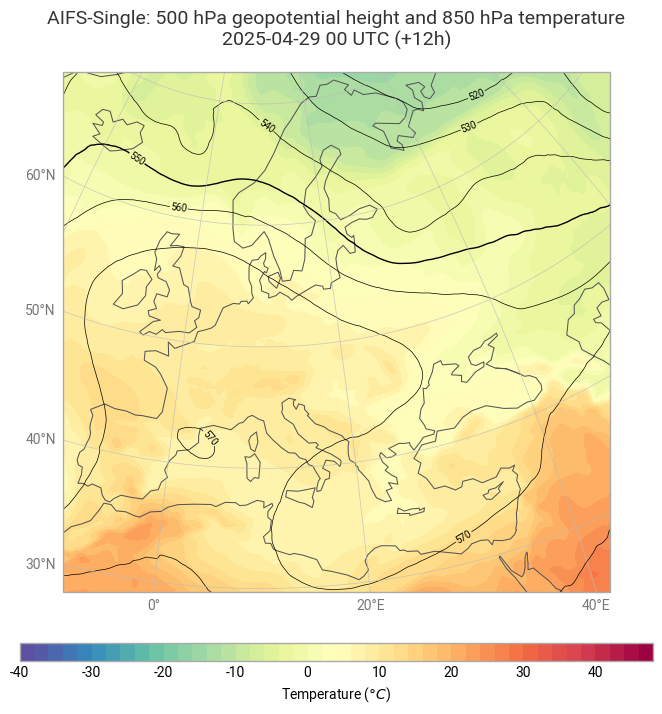

In [13]:
chart = ekp.Map(domain="Europe")

t850_shade = ekp.styles.Style(
    colors="Spectral_r",
    levels=range(-40, 50, 2),
    units="celsius",
)

chart.contourf(t850, style=t850_shade)

chart.contour(gh500,
              levels={"step": 10, "reference": 550},
              linecolors="black",
              linewidths=[0.5, 1, 0.5, 0.5],
              labels = True,
              legend_style = None,
              transform_first=True)

chart.coastlines(resolution="low")
chart.gridlines()

chart.legend(location="bottom", label="{variable_name} ({units})")

chart.title(
    "AIFS-Single: 500 hPa geopotential height and 850 hPa temperature\n"
    "{base_time:%Y-%m-%d %H} UTC (+{lead_time}h)\n",
    fontsize=14, horizontalalignment="center",
)
chart.save(f"{PLOTSDIR}{''.join(PARAM_PL)}_{MODEL}_{DATES[0]}{TIME}-{STEPS}h.png")
chart.show()

The plot below show the analysis of 2 metre temperature on 30 April at 00 UTC.

/usr/local/lib/python3.12/dist-packages/cartopy/io/__init__.py:242: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_cultural/ne_50m_populated_places.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


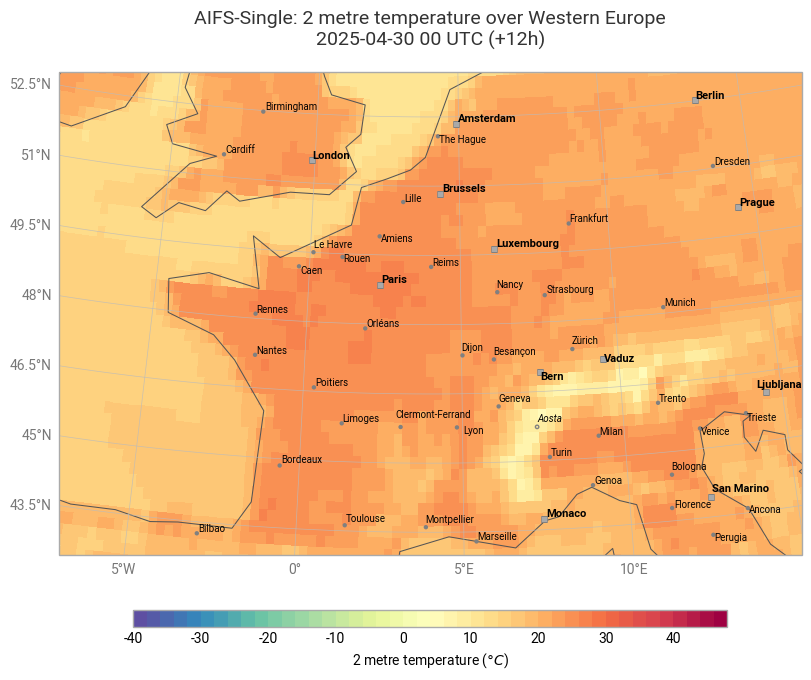

In [17]:
chart = ekp.Map(domain=[-7, 15, 43, 53])

t2m_shade = ekp.styles.Style(
    colors="Spectral_r",
    levels=range(-40, 50, 2),
    units="celsius",
)

chart.grid_cells(t2m, style=t2m_shade)

chart.title(
    "AIFS-Single: {variable_name} over Western Europe\n"
    "{base_time:%Y-%m-%d %H} UTC (+{lead_time}h)\n",
    fontsize=14, horizontalalignment="center",
)

chart.coastlines(resolution="low")
chart.gridlines()
chart.cities(adjust_labels=True)

chart.legend(location="bottom", label="{variable_name} ({units})")

chart.save(f"{PLOTSDIR}{''.join(PARAM_SFC)}_{MODEL}_{DATES[1]}{TIME}-{STEPS}h.png")
chart.show()

## Take home messages 📌

- Amazon's AWS hosts ECMWF open data from 2023 to 2025.
- Open data are available from both the Integrated Forecasting System (IFS) and the Artificial Intelligence Forecasting System (AIFS) models.
- These data can be searched and downloaded using the `ecmwf-opendata` package.
- Data analysis can be conducted using the `earthkit` package.
- Tutorials based on Jupyter notebooks contain example workflows which demonstrate how to explore ECMWF open data using Python packages.